In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (5,3)

sns.set_style("darkgrid")


pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
file_path = "Acetone_cycle_4.xlsx"
df = pd.read_excel(file_path)

In [3]:
VOC_ = "Water"

In [4]:
df

,Time,NU-1000_1_series,NU-1000-1_1_series,UIO-66_1_series,UIO-66-NH2_1_series,MIL-125_1_series,HKUST-1_1_series,ZIF-8_1_series,ZIF-8-1_1_series,UIO-66-NH2-1_2_series,UIO-66-NH-2_2_series,NU-1000-1_2_series,NU-1000-2_2_series,UIO-66-_2_series,MIL-125-1_2_series,MIL-125-2_2_series,HKUST-1-_2_series,ZIF-8-_2_series,NU-1000_Dropcast_series,MIL-125_Dropcast_series,UIO-66-NH2_Dropcast_series,HKUST-1_Dropcast_series,MIL-68-NH2_Dropcast_series,ZIF-67_Dropcast_series,ZIF-8-NH2_Dropcast_series,UIO-66_Dropcast_series,MOF-74_Dropcast_series,MIL-68_Dropcast_series,-,--,---,----,c32,VOC
0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acetone
1,0.248,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,-5009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acetone
2,0.498,0,2,0,10,1,0,0,0,0,20,0,0,0,0,0,0,-7478,2,0,7121,0,0,0,2,0,0,2,0,0,0,0,0,Acetone
3,0.744,0,4,0,10,2,0,0,0,0,36,0,25,0,0,0,0,-12025,4,0,13673,0,0,2,2,0,0,2,0,0,0,0,0,Acetone
4,0.992,0,4,2,10,2,0,0,0,0,70,0,53,1,0,9,0,-16538,4,0,19606,0,2,2,2,2,0,4,0,0,0,0,0,Acetone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,43.314,0,-14,-10,12,-10,0,0,-582,0,114,1,55,10,0,0,37,-8826,0,-4,26525,0,0,-3,0,-12,22,-8,0,0,0,0,0,Acetone
174,43.565,0,-14,-10,12,-10,0,0,-458,0,104,0,20,5,0,0,35,-7526,0,-4,16796,0,0,-2,0,-12,22,-8,0,0,0,0,0,Acetone
175,43.817,0,-12,-8,12,-10,0,0,-295,0,80,0,0,2,0,0,24,-4436,0,-2,12249,0,0,-2,0,-12,22,-8,0,0,0,0,0,Acetone
176,44.067,0,-12,-8,10,-10,0,0,0,0,30,0,0,0,0,0,15,-896,0,0,1430,0,0,-2,0,-12,22,-6,0,0,0,0,0,Acetone


In [5]:
df.columns

Index(['Time', 'NU-1000_1_series', 'NU-1000-1_1_series', 'UIO-66_1_series',
       'UIO-66-NH2_1_series', 'MIL-125_1_series', 'HKUST-1_1_series',
       'ZIF-8_1_series', 'ZIF-8-1_1_series', 'UIO-66-NH2-1_2_series',
       'UIO-66-NH-2_2_series', 'NU-1000-1_2_series', 'NU-1000-2_2_series',
       'UIO-66-_2_series', 'MIL-125-1_2_series', 'MIL-125-2_2_series',
       'HKUST-1-_2_series', 'ZIF-8-_2_series', 'NU-1000_Dropcast_series',
       'MIL-125_Dropcast_series', 'UIO-66-NH2_Dropcast_series',
       'HKUST-1_Dropcast_series', 'MIL-68-NH2_Dropcast_series',
       'ZIF-67_Dropcast_series', 'ZIF-8-NH2_Dropcast_series',
       'UIO-66_Dropcast_series', 'MOF-74_Dropcast_series',
       'MIL-68_Dropcast_series', '-', '--', '---', '----', 'c32', 'VOC'],
      dtype='object')

In [6]:
#df = df.iloc[:, :8]

In [7]:
# df

In [8]:
df = df[['Time', 'NU-1000_1_series', 'NU-1000-1_1_series', 'UIO-66_1_series',
       'UIO-66-NH2_1_series', 'MIL-125_1_series', 'HKUST-1_1_series',
       'ZIF-8_1_series', 'VOC']]
df

,Time,NU-1000_1_series,NU-1000-1_1_series,UIO-66_1_series,UIO-66-NH2_1_series,MIL-125_1_series,HKUST-1_1_series,ZIF-8_1_series,VOC
0,0.000,0,0,0,0,0,0,0,Acetone
1,0.248,0,0,0,3,0,0,0,Acetone
2,0.498,0,2,0,10,1,0,0,Acetone
3,0.744,0,4,0,10,2,0,0,Acetone
4,0.992,0,4,2,10,2,0,0,Acetone
...,...,...,...,...,...,...,...,...,...
173,43.314,0,-14,-10,12,-10,0,0,Acetone
174,43.565,0,-14,-10,12,-10,0,0,Acetone
175,43.817,0,-12,-8,12,-10,0,0,Acetone
176,44.067,0,-12,-8,10,-10,0,0,Acetone


In [9]:
# Rename the column
df.rename(columns={'NU-1000_1_series': 'NU-1000_1',
                  'NU-1000-1_1_series': 'NU-1000-1_1',
                 'UIO-66_1_series': 'UIO-66_1',
                                'UIO-66-NH2_1_series' : 'UIO-66-NH2_1',
                                 'MIL-125_1_series':'MIL-125_1', 
                                 'HKUST-1_1_series':'HKUST-1_1',
                                 'ZIF-8_1_series':'ZIF-8_1'
                                }, inplace=True)

In [10]:
df

,Time,NU-1000_1,NU-1000-1_1,UIO-66_1,UIO-66-NH2_1,MIL-125_1,HKUST-1_1,ZIF-8_1,VOC
0,0.000,0,0,0,0,0,0,0,Acetone
1,0.248,0,0,0,3,0,0,0,Acetone
2,0.498,0,2,0,10,1,0,0,Acetone
3,0.744,0,4,0,10,2,0,0,Acetone
4,0.992,0,4,2,10,2,0,0,Acetone
...,...,...,...,...,...,...,...,...,...
173,43.314,0,-14,-10,12,-10,0,0,Acetone
174,43.565,0,-14,-10,12,-10,0,0,Acetone
175,43.817,0,-12,-8,12,-10,0,0,Acetone
176,44.067,0,-12,-8,10,-10,0,0,Acetone


In [11]:
df.columns

Index(['Time', 'NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
       'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1', 'VOC'],
      dtype='object')

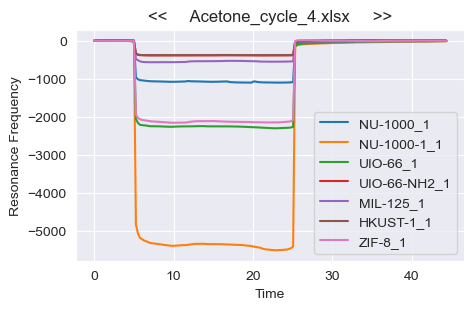

In [12]:
plot_columns = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
        'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

# plot_columns = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
#        'HKUST-1_1', 'ZIF-8_1']

# Plotting
plt.figure(figsize=(5, 3))
for column in plot_columns:
    plt.plot(df['Time'], df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Resonance Frequency')
plt.title(f'<<     {file_path}     >>'    )
plt.legend()


# Save the plot with the same name as file_path
plt.savefig(f"{file_path}.png")  # Save the plot with the name specified in file_path


plt.show()

In [13]:
dedectors = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
       'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

In [14]:
dedectors

['NU-1000_1',
 'NU-1000-1_1',
 'UIO-66_1',
 'UIO-66-NH2_1',
 'MIL-125_1',
 'HKUST-1_1',
 'ZIF-8_1']

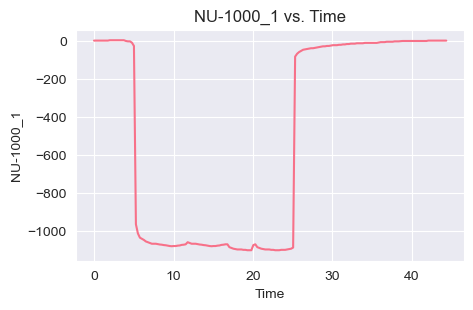

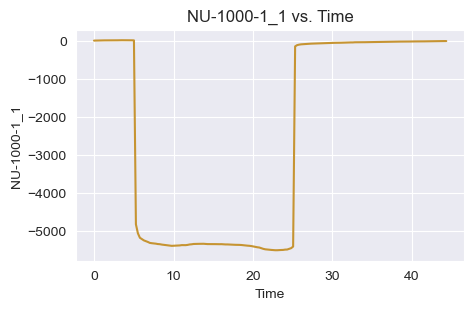

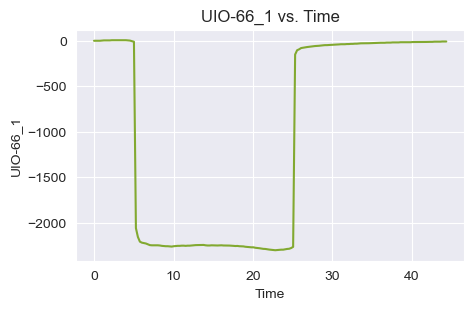

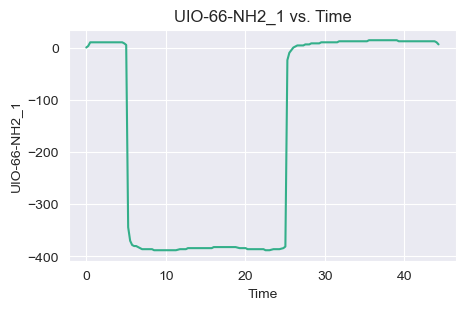

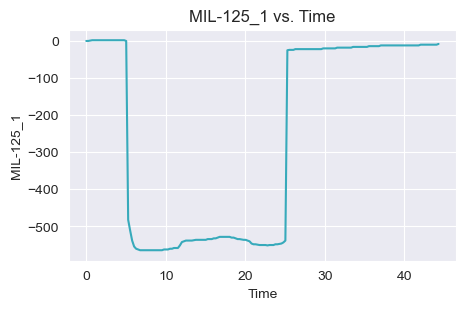

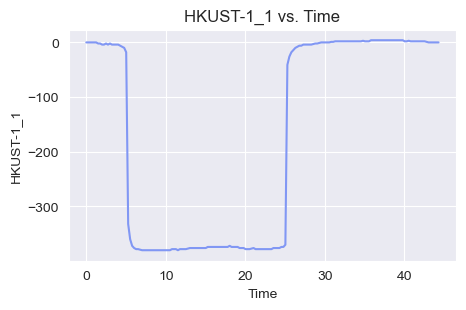

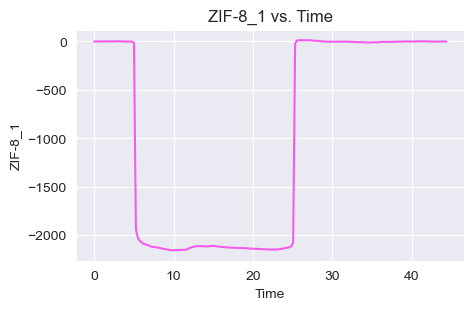

In [15]:
# List of detectors
detectors = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1', 'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

# Define a color palette with enough colors for each detector
palette = sns.color_palette("husl", len(detectors))

# Create subplots for each detector
for i, detector in enumerate(detectors):
    plt.figure(figsize=(5, 3))
    
    # Plot time against the detector with a unique color
    sns.lineplot(data=df, x='Time', y=detector, color=palette[i])
        
    # Set plot title and labels
    plt.title(f'{detector} vs. Time')
    plt.xlabel('Time')
    plt.ylabel(detector)
    plt.grid(True)
    
    # Show plot
    plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          178 non-null    float64
 1   NU-1000_1     178 non-null    int64  
 2   NU-1000-1_1   178 non-null    int64  
 3   UIO-66_1      178 non-null    int64  
 4   UIO-66-NH2_1  178 non-null    int64  
 5   MIL-125_1     178 non-null    int64  
 6   HKUST-1_1     178 non-null    int64  
 7   ZIF-8_1       178 non-null    int64  
 8   VOC           178 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 12.6+ KB


In [17]:
df_1 = df[(df["Time"] > 4.8) & (df["Time"] < 25)]

In [18]:
df_1.head(5)

,Time,NU-1000_1,NU-1000-1_1,UIO-66_1,UIO-66-NH2_1,MIL-125_1,HKUST-1_1,ZIF-8_1,VOC
20,5.023,-28,6,-11,5,0,-18,-13,Acetone
21,5.271,-964,-4822,-2057,-344,-482,-332,-1943,Acetone
22,5.522,-1012,-5059,-2155,-370,-511,-360,-2029,Acetone
23,5.771,-1034,-5175,-2206,-378,-538,-372,-2059,Acetone
24,6.022,-1040,-5209,-2217,-380,-554,-376,-2077,Acetone


In [19]:
df_1.tail(5)

,Time,NU-1000_1,NU-1000-1_1,UIO-66_1,UIO-66-NH2_1,MIL-125_1,HKUST-1_1,ZIF-8_1,VOC
95,23.796,-1098,-5494,-2294,-386,-548,-376,-2137,Acetone
96,24.045,-1098,-5486,-2290,-386,-548,-376,-2132,Acetone
97,24.297,-1096,-5484,-2286,-386,-547,-376,-2128,Acetone
98,24.549,-1094,-5465,-2284,-385,-546,-374,-2122,Acetone
99,24.798,-1092,-5448,-2276,-384,-543,-374,-2114,Acetone


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


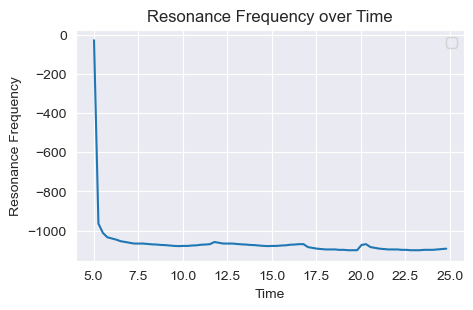

In [20]:
plot_columns = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
       'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

sns.lineplot(data=df_1, x=df_1['Time'], y=df_1['NU-1000_1'])

plt.xlabel('Time')
plt.ylabel('Resonance Frequency')
plt.title('Resonance Frequency over Time')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


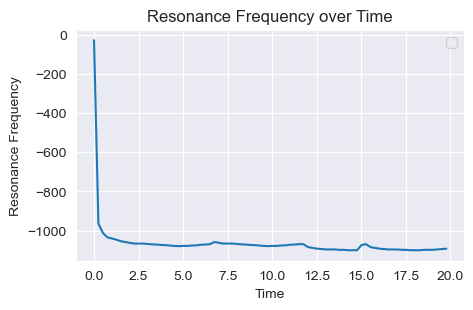

In [21]:
plot_columns = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
       'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

min_time = df_1['Time'].min()
df_1['Time'] -= min_time




sns.lineplot(data=df_1, x=df_1['Time'], y=df_1['NU-1000_1'])

plt.xlabel('Time')
plt.ylabel('Resonance Frequency')
plt.title('Resonance Frequency over Time')
plt.legend()
plt.show()

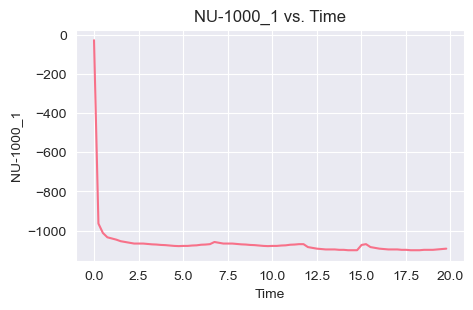

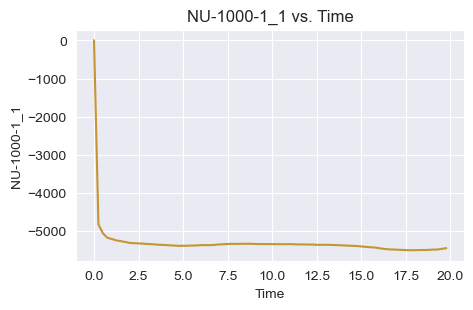

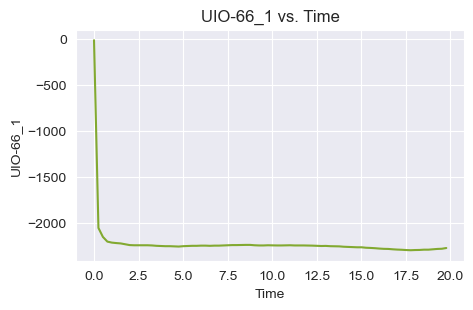

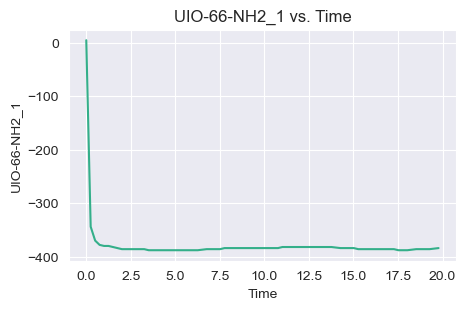

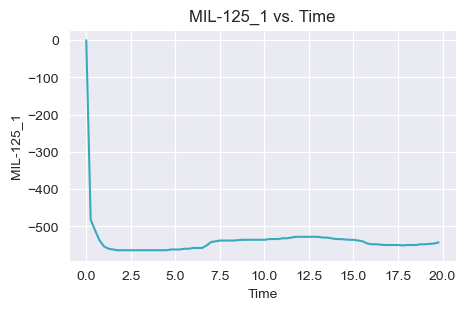

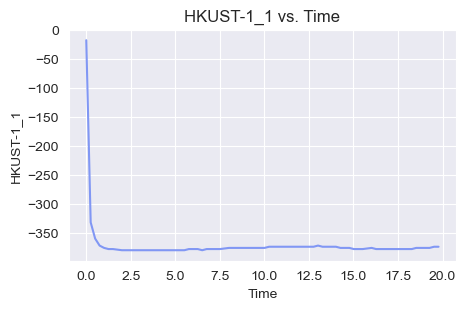

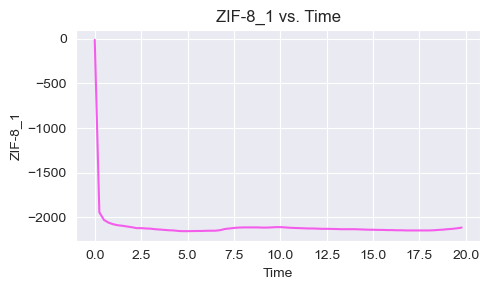

In [22]:
# List of detectors
detectors = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1', 'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

# Define a color palette with enough colors for each detector
palette = sns.color_palette("husl", len(detectors))

# Create subplots for each detector
for i, detector in enumerate(detectors):
    plt.figure(figsize=(5, 3))
    
    # Plot time against the detector with a unique color
    sns.lineplot(data=df_1, x='Time', y=detector, color=palette[i])
    
    # Set plot title and labels
    plt.title(f'{detector} vs. Time')
    plt.xlabel('Time')
    plt.ylabel(detector)
    plt.grid(True)
    
# Create legend
#plt.legend(title='Detectors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [23]:
# SAVE The DATA
# Save the filtered DataFrame to CSV



user_choice = input(""""Enter \n '1' for TEST, \n '2' for TRAIN, \n '3' for in case you need """)    

if user_choice == '1':
    test_data = df_1
    file_name_test = f"TEST__{VOC_}.csv"
    test_data.to_csv(file_name_test, index=False)

elif user_choice == '2':
    train_data = df_1
    file_name_train = f"TRAIN__{VOC_}.csv"
    train_data.to_csv(file_name_train, index=False)
elif user_choice == '3':
    spare_data = df_1
    file_name_spare = f"SPARE__{VOC_}.csv"
    spare_data.to_csv(file_name_spare, index=False)

else:
    print("Invalid choice!")

print("Finished")

# file_name_train = f"{}__{VOC_}.csv"
# train_data.to_csv(file_name_train, index=False)
# print(f"TRAIN DATA saved as {file_name_train}")    


"Enter 
 '1' for TEST, 
 '2' for TRAIN, 
 '3' for in case you need 1
Finished


In [24]:
*

SyntaxError: invalid syntax (796671574.py, line 1)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
file_path_2 = "Ethanol_cycle_1.xlsx"
df_X = pd.read_excel(file_path_2)

FileNotFoundError: [Errno 2] No such file or directory: 'Ethanol_cycle_1.xlsx'

In [ ]:
df_X

In [ ]:
df_X = df_X[['Time', 'NU-1000_1_series', 'NU-1000-1_1_series', 'UIO-66_1_series',
       'UIO-66-NH2_1_series', 'MIL-125_1_series', 'HKUST-1_1_series',
       'ZIF-8_1_series', 'VOC']]
df_X.head(5)

In [ ]:
df_X['MIL-125_1_series'] = df_X['MIL-125_1_series'] + 600
df_X.head(5)

In [ ]:
df_X.to_excel("Ethanol_cycle_1.xlsx", index=False)

In [ ]:
# file_path_2 = "TRAIN__DMSO.csv"
# df_X = pd.read_csv(file_path_2)

In [ ]:
# plot_columns = ['NU-1000_1', 'NU-1000-1_1', 'UIO-66_1', 'UIO-66-NH2_1',
#        'MIL-125_1', 'HKUST-1_1', 'ZIF-8_1']

# # Plotting
# plt.figure(figsize=(5, 3))
# for column in plot_columns:
#     plt.plot(df_X['Time'], df_X[column], label=column)

# plt.xlabel('Time')
# plt.ylabel('Resonance Frequency')
# plt.title(f'<<     {file_path_2}     >>'    )
# plt.legend()


# # Save the plot with the same name as file_path
# plt.savefig(f"{file_path_2}.png")  # Save the plot with the name specified in file_path


# plt.show()